In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Now let's install yfinance to be able to import datasets from yahoo finance

In [2]:
!pip install yfinance --upgrade --no-cache-dir

Requirement already up-to-date: yfinance in c:\users\cleme\appdata\local\programs\python\python36-32\lib\site-packages (0.1.45)


In [3]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
df_full = pdr.get_data_yahoo("JPM", start="2018-01-01").reset_index()
df_full.to_csv('JPM.csv',index=False)
df_full.head()

[*********************100%***********************]  1 of 1 downloaded


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,107.63,108.02,106.81,107.95,103.16,13578800
1,2018-01-03,107.86,108.49,107.48,108.06,103.26,11901000
2,2018-01-04,108.36,110.03,108.20,109.04,104.74,12953700
3,2018-01-05,109.26,109.55,107.78,108.34,104.07,14155000
4,2018-01-08,108.15,108.68,107.70,108.50,104.22,12466500


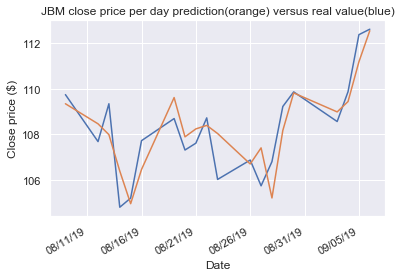

In [4]:
# 1. Linear Regression

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

price_x = [[x] for x in df_full['Open']]
price_y = [x for x in df_full['Close']]

price_x_train = price_x[:-20]
price_x_test = price_x[-20:]

price_y_train = price_y[:-20]
price_y_test = price_y[-20:]

regr = linear_model.LinearRegression()
regr.fit(price_x_train, price_y_train)

# Make predictions using the testing set
price_y_pred = regr.predict(price_x_test)

# The coefficients
#print('Coefficients: \n', regr.coef_)
# The mean squared error
#print("Mean squared error: %.2f"
#      % mean_squared_error(price_y_test, price_y_pred))
# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % r2_score(price_y_test, price_y_pred))

# Data for plotting
x_axis_date = [i for i in df_full['Date'][-20:]]
y_axis_real_close_value = [i for i in df_full['Close'][-20:]]

fig, ax = plt.subplots()
ax.plot(x_axis_date, y_axis_real_close_value)
ax.plot(x_axis_date, price_y_pred)

days = mdates.DayLocator(interval=5)
days_fmt = mdates.DateFormatter('%D')

ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(days_fmt)

ax.grid(True)

ax.set(xlabel='Date', ylabel='Close price ($)',
       title='JBM close price per day prediction(orange) versus real value(blue)')

fig.autofmt_xdate()

plt.show()

In [5]:
# 2. Lasso

In [6]:
# 3. Bayesian Regression